## Al respecto de transformada de fourier

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

$\sigma ^2 = \sum_i \frac{(x_i-\mu)^2} {N-1}$

$\sigma = +\sqrt{\sigma^2}$

### Transformada de fourier continua

$$\frac{1}{2\pi} \int_{-\infty}^{\infty}f(t)e^{-iwt}dt$$

$ e^{-iwt} = cos(wt) - isin(wt)$ 

$ e^{iwt} = cos(wt) + isin(wt)$

$f*h(t) = \int_{-\inf} ^{\inf}{f(\tau)h(t-\tau) d\tau} $

$f * h(t) = fourier^{-1} F x H (\Omega)$

### En un contexto discreto y bidimensional

$$F(k, l) = \sum_{i=0}^{N-1}\sum_{j=0}^{M-1}f(i.j)e^{-i2\pi(\frac{k_i}{N} + \frac{l_j}{M})}$$

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

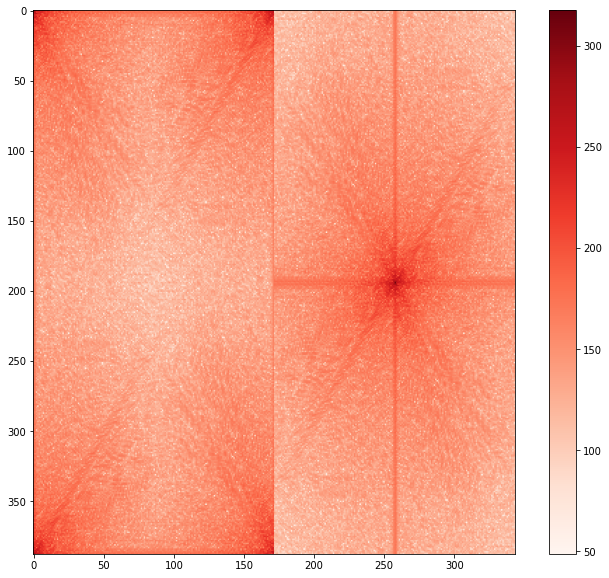

In [26]:
fftim = np.fft.fft2(img)
fftim_s = np.fft.fftshift(fftim)
magnitude1 = 20 * np.log(np.abs(fftim))
magnitude2 = 20 * np.log(np.abs(fftim_s))
stacked = np.hstack(tup=(magnitude1, magnitude2))
plt.figure(figsize=(12,10))
plt.imshow(stacked, cmap=plt.cm.Reds)
plt.colorbar()

In [5]:
img = cv2.imread('images/lena_s.png', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

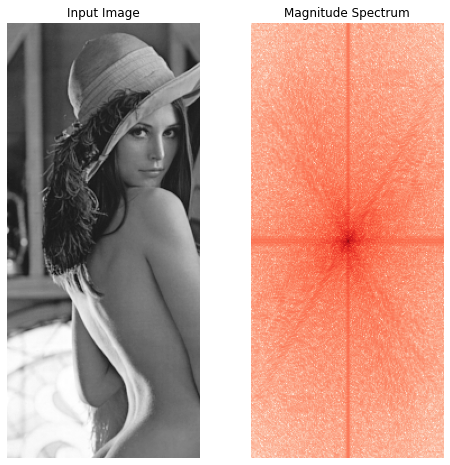

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(121); plt.imshow(img, cmap=plt.cm.gray)
plt.title("Input Image"); plt.axis('off')
plt.subplot(122); plt.imshow(magnitude_spectrum, cmap=plt.cm.Reds)
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

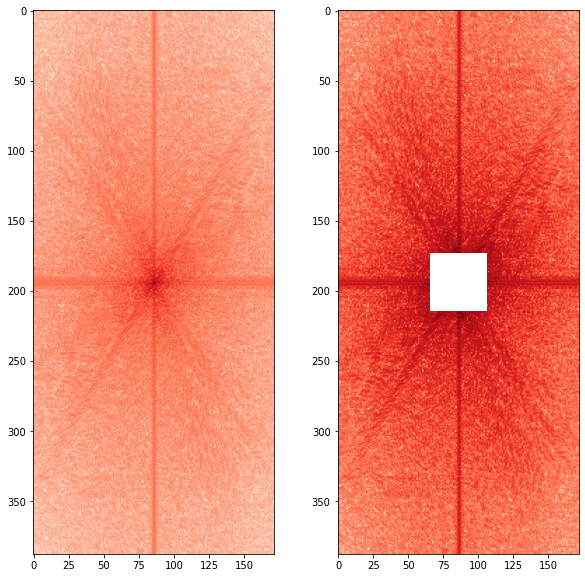

In [29]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow - 20: crow + 20, ccol - 20: ccol + 20] = 0
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(magnitude_spectrum, cmap=plt.cm.Reds)
magnitude_spectrum2 = 20 * np.log(np.abs(fshift))
plt.subplot(122); plt.imshow(magnitude_spectrum2, cmap=plt.cm.Reds)
plt.show()

# pasa altas

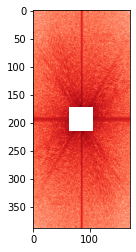

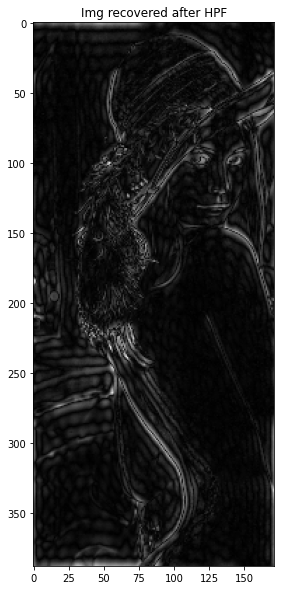

In [35]:
plt.imshow(magnitude_spectrum2, cmap=plt.cm.Reds)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back_h = np.abs(img_back)
plt.figure(figsize=(10,10))
plt.imshow(img_back_h, cmap=plt.cm.gray)
plt.title("Img recovered after HPF")
plt.show()

In [37]:
img = cv2.imread('images/lena_s.png', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

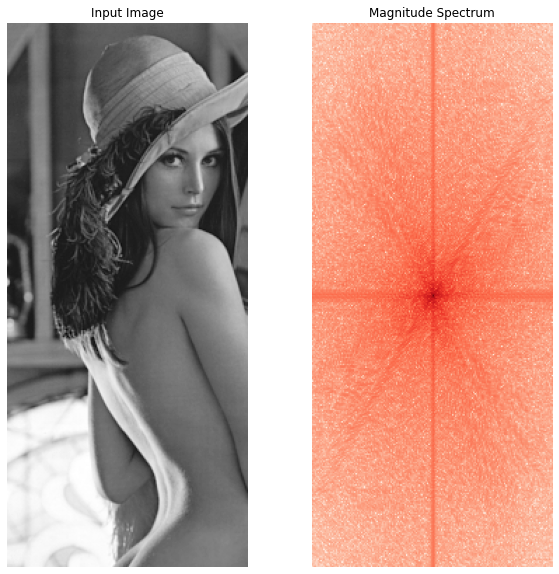

In [39]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap=plt.cm.Reds)
plt.title('Magnitude Spectrum'); plt.axis('off')# plt.xticks([]), plt.yticks([])
plt.show()

# pasa bajas

In [61]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 50: crow + 50, ccol - 50: ccol + 50, 0] = 1
mask[:, :, 1] = 1
mask[crow - 50: crow + 50, ccol - 50: ccol + 50, 1] = 0

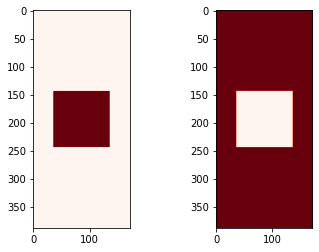

In [62]:
plt.subplot(121)
plt.imshow(mask[:,:,0], cmap=plt.cm.Reds)
plt.subplot(122)
plt.imshow(mask[:,:,1], cmap=plt.cm.Reds)

In [66]:
# apply mask and inverse DFT
fshift0 = dft_shift[:,:,0] * mask[:,:,1]
fshift1 = dft_shift[:,:,1] * mask[:,:,1]
fshift = np.stack((fshift0,fshift1), axis=2)
fshift.shape

(388, 172, 2)

In [67]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back_l = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

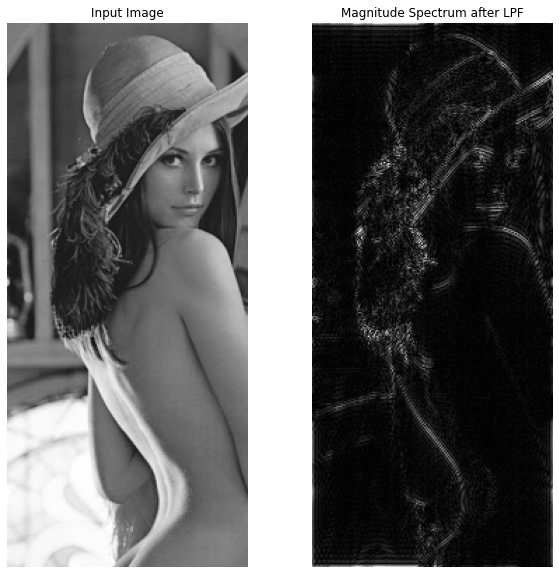

In [68]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122),plt.imshow(img_back_l, cmap = 'gray')
plt.title('Magnitude Spectrum after LPF'), plt.axis('off')
plt.show()

In [70]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr_x = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Filter Array
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr_x]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
               'sobel_y', 'scharr_x']

$\nabla = (d/dx, d/dy, d/dz)$

gradiente = $\nabla f(x,y,z)$

laplaciano $\nabla . \nabla $

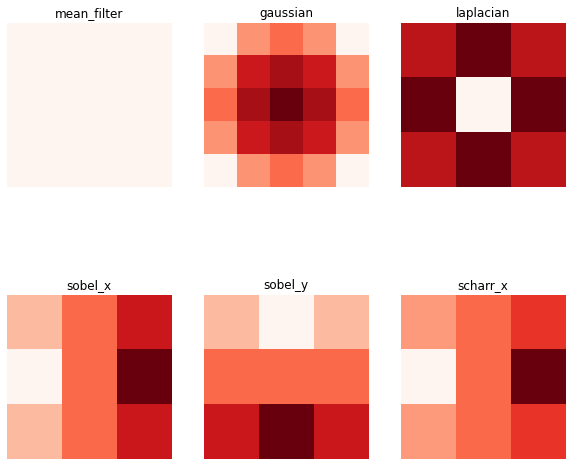

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10), gridspec_kw = {'wspace':0.2, 'hspace':0})
axes = axes.reshape(-1,)
for ia, ax in enumerate(axes):
    ax.imshow(filters[ia], cmap=plt.cm.Reds)
    ax.set_title(filter_name[ia])
    ax.set_axis_off()
#plt.tight_layout()
plt.show()

In [73]:
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

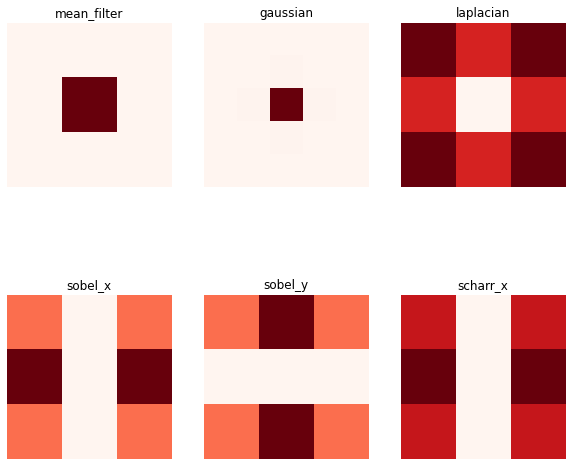

In [75]:
fig, axes = plt.subplots(2,3, figsize=(10,10), gridspec_kw={'wspace':0.2, 'hspace':0})
axes = axes.reshape(-1,)
for ia, ax in enumerate(axes):
    ax.imshow(mag_spectrum[ia], cmap =plt.cm.Reds)  # , interpolation='bilinear')
    ax.set_title(filter_name[ia])
    ax.set_axis_off()
plt.show()

In [92]:
filtrada = cv2.filter2D(img, cv2.CV_64F, laplacian)
filtrada = cv2.convertScaleAbs(filtrada)

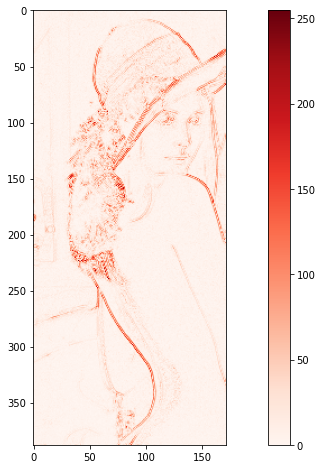

In [93]:
plt.figure(figsize=(15,8))
plt.imshow(filtrada, cmap=plt.cm.Reds)
plt.colorbar()

In [ ]:
b,g,r = cv2.split(img)
# para cada capa
cv2.filter2d(b, ...
cv2.convertScaleAbs(filtb)
cv2.merge((filtb, filtg,...))
# 

In [95]:
cv2.blur(img, ksize=3)

SystemError: new style getargs format but argument is not a tuple

In [89]:
cv2.imshow("", filtrada); cv2.waitKey(); cv2.destroyAllWindows()

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:632: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
